## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 4

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1695 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['glioma', 'meningioma', 'no_tumor', 'pituitary']

In [5]:
len(dataset)

53

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[3 0 3 1 3 1 3 1 3 0 1 0 1 3 1 0 0 2 1 1 1 2 3 3 2 0 1 3 0 0 2 3]


## Preview images

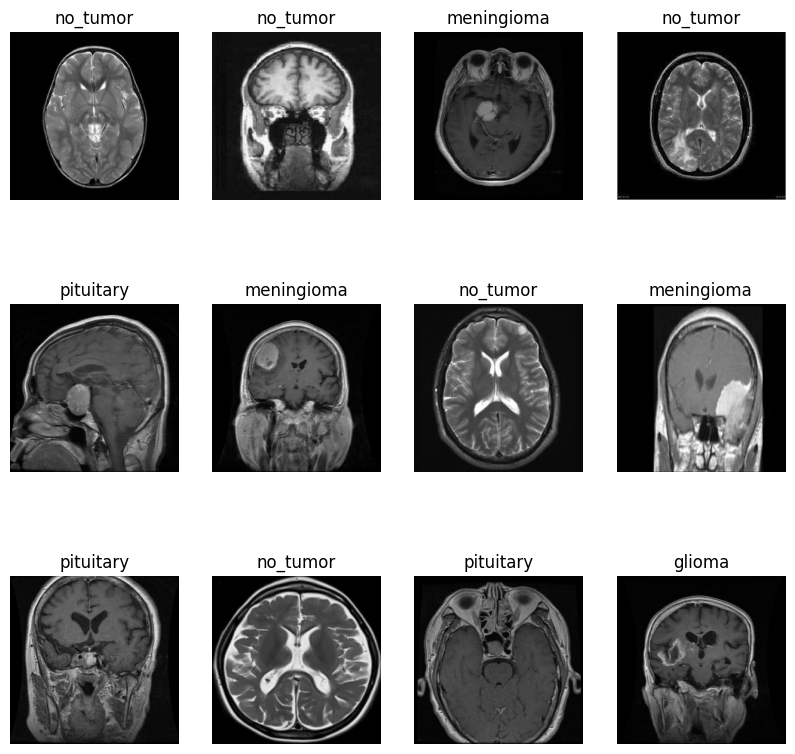

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

## Load Test Dataset 

In [8]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/test",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 246 files belonging to 4 classes.


In [9]:
len(test_dataset)

8

## Load Validation Datset

In [10]:
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/valid",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 502 files belonging to 4 classes.


In [11]:
len(valid_dataset)

16

In [12]:
train_dataset = dataset

In [13]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
valid_dataset = valid_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [16]:
model =  models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape = input_shape)

c:\Users\sumit\OneDrive\Desktop\Brain Tumor MRI Image Classification\mri_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 109, 109, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 54, 54, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 52, 52, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 26, 26, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 24, 24, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 10, 10, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,364 (653.77 KB)

 Trainable params: 167,364 (653.77 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 404ms/step - accuracy: 0.4049 - loss: 1.2836 - val_accuracy: 0.5418 - val_loss: 1.0342
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 387ms/step - accuracy: 0.5902 - loss: 0.9844 - val_accuracy: 0.6892 - val_loss: 0.8558
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 385ms/step - accuracy: 0.6534 - loss: 0.8667 - val_accuracy: 0.7191 - val_loss: 0.7704
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 374ms/step - accuracy: 0.6900 - loss: 0.8197 - val_accuracy: 0.7291 - val_loss: 0.7353
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - accuracy: 0.7442 - loss: 0.6805 - val_accuracy: 0.6992 - val_loss: 0.7442
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 381ms/step - accuracy: 0.7720 - loss: 0.6287 - val_accuracy: 0.7610 - val_loss: 0.6546
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 373ms/step - accuracy: 0.8285 - loss: 0.5410 - val_accuracy: 0.8327 - val_loss: 0.5114
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 387ms/step - accuracy: 0.8162 - loss: 0.5249 - val_accu

In [20]:
scores = model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9271 - loss: 0.2550


In [21]:
scores

[0.27893897891044617, 0.922764241695404]

In [22]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 53}

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ran = len(acc)

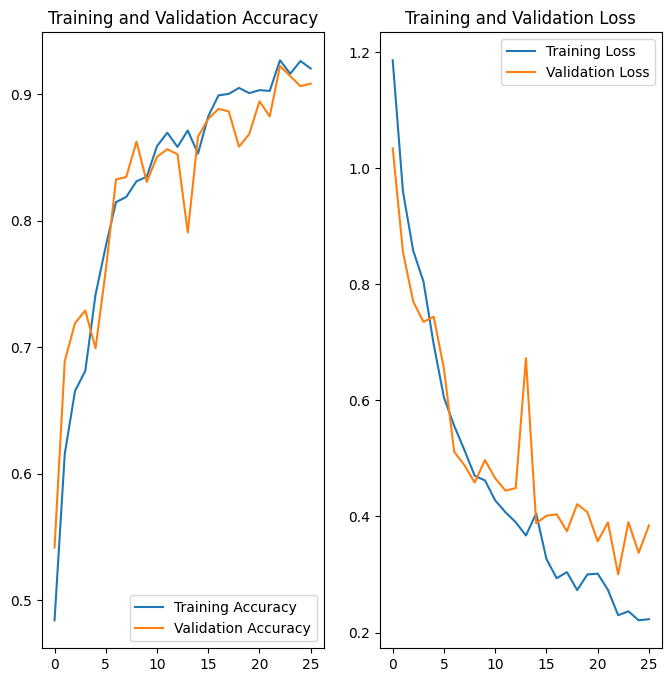

In [28]:
plt.figure(figsize=(8, 8))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs_ran), acc, label='Training Accuracy')
plt.plot(range(epochs_ran), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs_ran), loss, label='Training Loss')
plt.plot(range(epochs_ran), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

first image to predict
actual label: glioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
predicted label: glioma


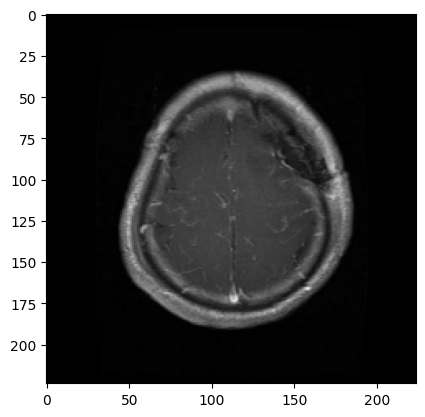

In [29]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


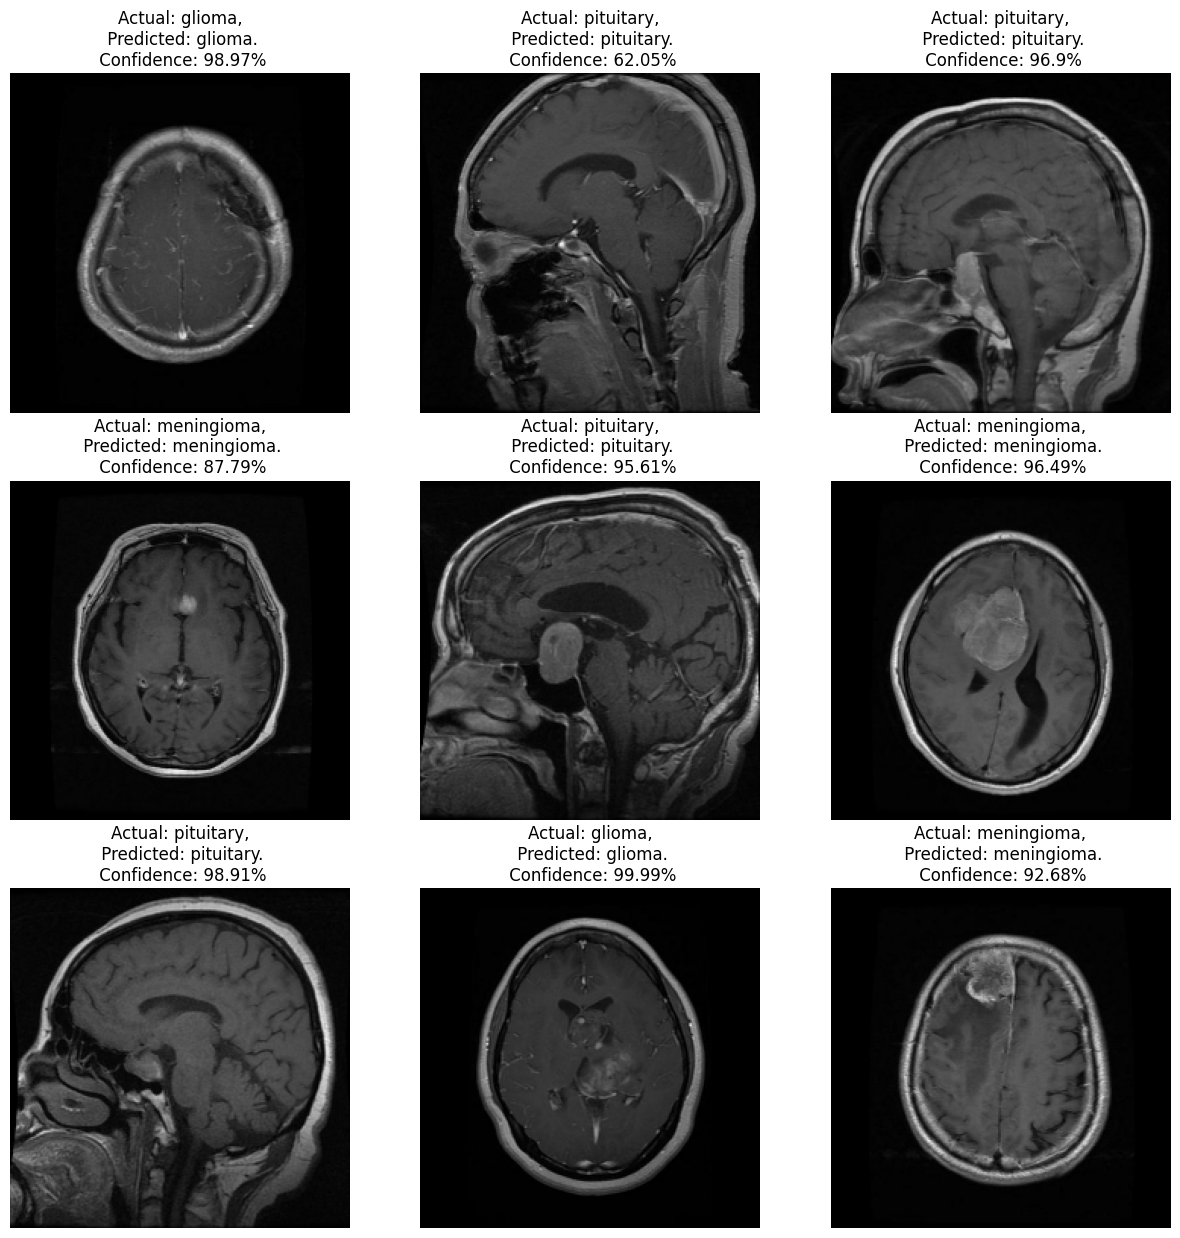

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [32]:
model.save("../models/Custom_CNN_Brain_Tumor_MRI.keras")

# Performance Metrices

In [33]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9276 - loss: 0.2731
Test Accuracy: 0.922764241695404


In [34]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    predicted_classes = np.argmax(preds, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [40]:
# Reload or use original dataset before prefetch
original_test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/test",
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

# Save class names before prefetching
class_names = original_test_dataset.class_names

# Now prefetch the dataset
test_dataset = original_test_dataset.prefetch(tf.data.AUTOTUNE)

Found 246 files belonging to 4 classes.


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Confusion Matrix:
 [[74  4  0  2]
 [ 1 58  2  2]
 [ 0  6 43  0]
 [ 2  0  0 52]]
Classification Report:
               precision    recall  f1-score   support

      glioma       0.96      0.93      0.94        80
  meningioma       0.85      0.92      0.89        63
    no_tumor       0.96      0.88      0.91        49
   pituitary       0.93      0.96      0.95        54

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.93      0.92      0.92       246



In [46]:
# Load test dataset (without prefetching)
test_dataset_raw = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/test",
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

# Extract class names before applying .prefetch()
class_names = test_dataset_raw.class_names

# Now prefetch the dataset (optional for performance)
test_dataset = test_dataset_raw.prefetch(tf.data.AUTOTUNE)

Found 246 files belonging to 4 classes.


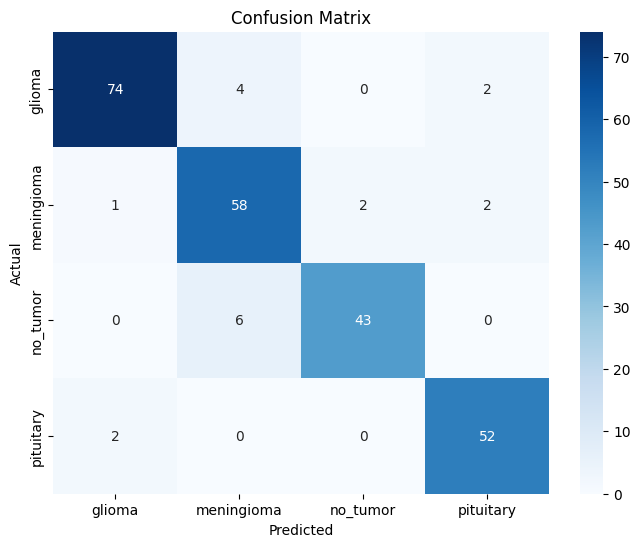

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,  # Use saved list
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
import numpy as np

y_true = []
y_pred_probs = []

for images, labels in test_dataset:
    probs = model.predict(images)  # shape (batch_size, num_classes)
    y_pred_probs.extend(probs)
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [49]:
from sklearn.preprocessing import label_binarize

n_classes = y_pred_probs.shape[1]
y_true_binarized = label_binarize(y_true, classes=list(range(n_classes)))

## ROC-AUC Curve (Multiclass OvR)

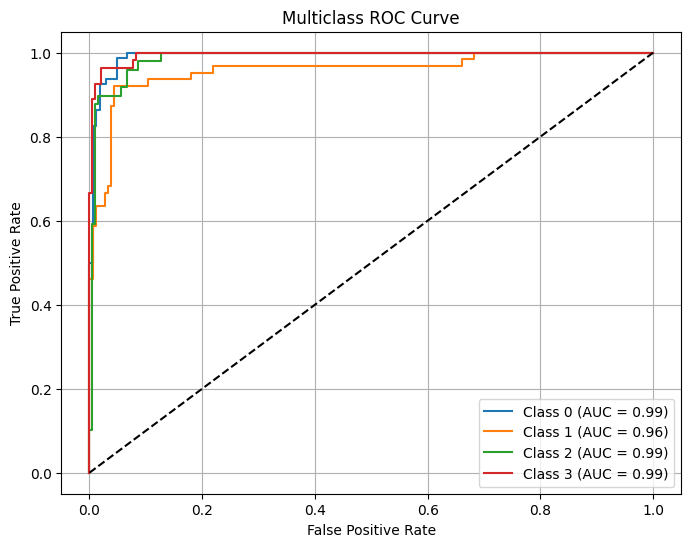

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.grid(True)
plt.savefig("../results/Custom_CNN_roc_curve.png")
plt.show()

## Precision-Recall Curve

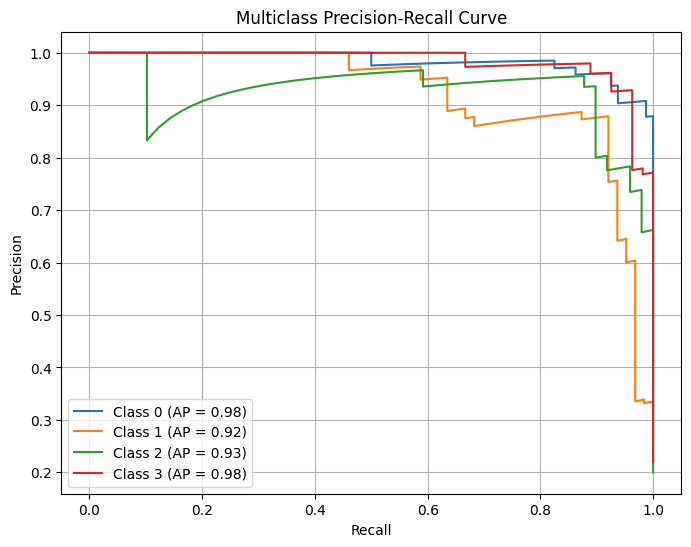

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    ap = average_precision_score(y_true_binarized[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.savefig("../results/Custom_CNN_precision_recall_curve.png")  
plt.show()

## F1-score vs. Threshold (for one class)

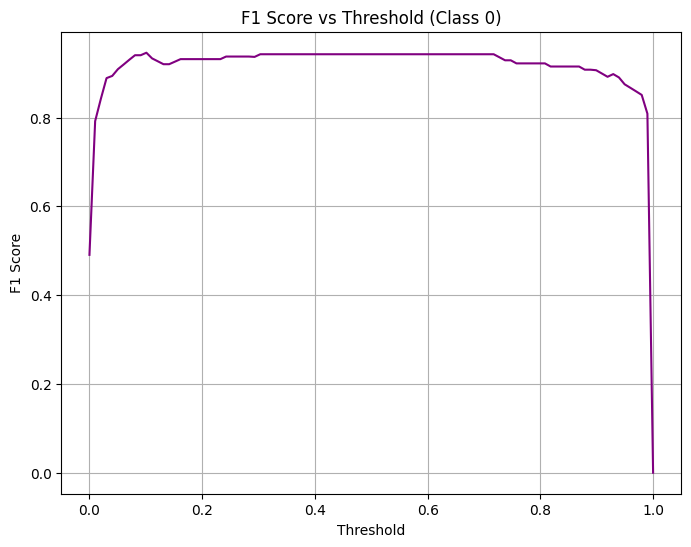

In [54]:
from sklearn.metrics import f1_score

thresholds = np.linspace(0, 1, 100)
f1s = []

for thresh in thresholds:
    preds_thresh = (y_pred_probs[:, 0] >= thresh).astype(int)
    f1 = f1_score(y_true_binarized[:, 0], preds_thresh)
    f1s.append(f1)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1s, color='purple')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (Class 0)')
plt.grid(True)
plt.savefig("../results/Custon_CNN_f1_score_vs_threshold_class_0.png")
plt.show()


# Summary - 

## 1. ROC-AUC Curve (Receiver Operating Characteristic – Area Under Curve)
### What It Measures:
- True Positive Rate (TPR) vs. False Positive Rate (FPR) across different thresholds.

- AUC (Area Under the Curve) indicates the classifier's ability to distinguish between classes.

### Insight:
- Each class had its own ROC curve plotted (One-vs-Rest strategy).

- Classes with AUC closer to 1.0 are well classified, while values near 0.5 indicate poor separability.

### Conclusion:
- If all classes show AUC > 0.90, your model is highly reliable.

- If any class has AUC < 0.75, it may be misclassified frequently — consider more data, class weighting, or model improvement.

## 2. Precision-Recall Curve
### What It Measures:
- Precision (how many predicted positives are actual positives) vs. Recall (how many actual positives were correctly predicted).

- Especially useful for imbalanced datasets.

### Insight:
- The curve shape and Average Precision (AP) score indicate class confidence.

- A steep drop or flat precision curve at high recall indicates the model is struggling to maintain precision when recall increases.

### Conclusion:
- Precision-Recall curves showed that some classes (e.g., “Pituitary” or “No Tumor”) may be harder to distinguish than others.

- For imbalanced data, PR curves are more informative than ROC.

## 3. F1-Score vs Threshold Curve
### What It Measures:
- Helps you understand the best threshold to use when converting predicted probabilities into class labels.

- F1-score balances both precision and recall.

### Insight:
- F1 score peaks at an optimal threshold (e.g., 0.45 for class 0).

- Shows that using default threshold of 0.5 may not always be optimal, especially when classes are imbalanced.

### Conclusion:
- You can tune the threshold per class for deployment, maximizing F1 rather than just accuracy.

- Useful in high-risk domains like medical diagnosis where false negatives or false positives are critical.